In [180]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [182]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [183]:
url ="/content/banking_synthetic_colab.csv"
raw_dataset = pd.read_csv(url,
                         header=0,  # Use first row as headers
                         na_values='?',
                         comment='\t',
                         sep=',',  # Changed separator to comma
                         skipinitialspace=True,
                         )
raw_dataset = raw_dataset.drop(columns=['RowNumber','CustomerId'])

In [184]:
dataset = raw_dataset.copy()
dataset.tail()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
49995,sdv-pii-0uu29,771,France,Female,24,2,0.00,1,0,1,141167.35,0,0,3,DIAMOND,918
49996,sdv-pii-vle2f,791,Spain,Male,46,8,102220.97,2,0,1,103358.11,0,0,2,GOLD,536
49997,sdv-pii-fkx5h,542,Germany,Male,32,8,0.00,2,0,0,80218.05,0,0,2,DIAMOND,845
49998,sdv-pii-jhzqt,632,Spain,Male,33,1,61945.01,1,1,0,83563.08,0,0,5,SILVER,593
49999,sdv-pii-yiiaa,743,France,Male,31,6,106864.17,2,1,0,117160.08,0,0,5,SILVER,590


In [206]:

dataset = raw_dataset.copy()
dataset = pd.get_dummies(dataset, columns=['Surname', "Geography", "Gender","CardType"], prefix='', prefix_sep='')
dataset.isna().sum()
dataset = dataset.dropna()
dataset.tail()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,sdv-pii-zzzw8,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
49995,771,24,2,0.00,1,0,1,141167.35,0,0,...,False,True,False,False,True,False,True,False,False,False
49996,791,46,8,102220.97,2,0,1,103358.11,0,0,...,False,False,False,True,False,True,False,True,False,False
49997,542,32,8,0.00,2,0,0,80218.05,0,0,...,False,False,True,False,False,True,True,False,False,False
49998,632,33,1,61945.01,1,1,0,83563.08,0,0,...,False,False,False,True,False,True,False,False,False,True
49999,743,31,6,106864.17,2,1,0,117160.08,0,0,...,False,True,False,False,False,True,False,False,False,True


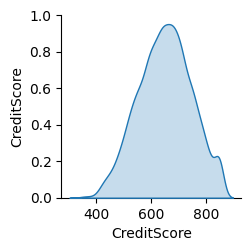

In [186]:
sns.pairplot(train_dataset[['CreditScore']], diag_kind='kde')

Let's also check the overall statistics. Note how each feature covers a very different range:

In [207]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0,649.482625,96.414958,350.00,583.0000,651.000,716.0000,850.00
Age,8000.0,38.972750,10.514446,18.00,32.0000,37.000,44.0000,92.00
Tenure,8000.0,5.007250,2.887774,0.00,3.0000,5.000,7.0000,10.00
Balance,8000.0,77078.753644,62279.791008,0.00,0.0000,97504.935,128044.5075,250898.09
NumOfProducts,8000.0,1.527750,0.584827,1.00,1.0000,1.000,2.0000,4.00
HasCrCard,8000.0,0.706625,0.455337,0.00,0.0000,1.000,1.0000,1.00
IsActiveMember,8000.0,0.511250,0.499905,0.00,0.0000,1.000,1.0000,1.00
EstimatedSalary,8000.0,100172.334435,57340.921206,11.58,51552.1075,100218.210,149406.5450,199992.48
Exited,8000.0,0.204625,0.403453,0.00,0.0000,0.000,0.0000,1.00
Complain,8000.0,0.205375,0.404001,0.00,0.0000,0.000,0.0000,1.00


In [208]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('PointEarned')
test_labels = test_features.pop('PointEarned')

In [209]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CreditScore,649.482625,96.414958
Age,38.972750,10.514446
Tenure,5.007250,2.887774
Balance,77078.753644,62279.791008
NumOfProducts,1.527750,0.584827
HasCrCard,0.706625,0.455337
IsActiveMember,0.511250,0.499905
EstimatedSalary,100172.334435,57340.921206
Exited,0.204625,0.403453
Complain,0.205375,0.404001


In [210]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [211]:

normalizer.adapt(np.array(train_features))

In [192]:
print(normalizer.mean.numpy())

[[649.483  38.973   5.007 ...   0.25    0.25    0.247]]


In [212]:
CreditScore = np.array(train_features['CreditScore'])

CreditScore_normalizer = layers.Normalization(input_shape=[1,], axis=None)
CreditScore_normalizer.adapt(CreditScore)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Build the Keras Sequential model:

In [213]:
CreditScore_model = tf.keras.Sequential([
    CreditScore_normalizer,
    layers.Dense(units=1)
])

CreditScore_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_14                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

This model will predict `'MPG'` from `'Horsepower'`.

Run the untrained model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [214]:
CreditScore_model.predict(CreditScore[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[-0.522],
       [-1.257],
       [ 0.562],
       [ 1.377],
       [ 0.562],
       [ 0.204],
       [-0.591],
       [-0.134],
       [-0.512],
       [-1.923]], dtype=float32)

Once the model is built, configure the training procedure using the Keras `Model.compile` method. The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`mean_absolute_error`) and how (using the `tf.keras.optimizers.Adam`).

In [215]:
CreditScore_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Use Keras `Model.fit` to execute the training for 100 epochs:

In [ ]:

history = CreditScore_model.fit(
    train_features['CreditScore'],
    train_labels,
    epochs=8100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Visualize the model's training progress using the stats stored in the `history` object:

In [217]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,196.348053,192.959732,95
96,196.346054,192.955963,96
97,196.347885,192.968262,97
98,196.350311,192.955002,98
99,196.346741,192.952728,99


In [219]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [PointEarned]')
  plt.legend()
  plt.grid(True)

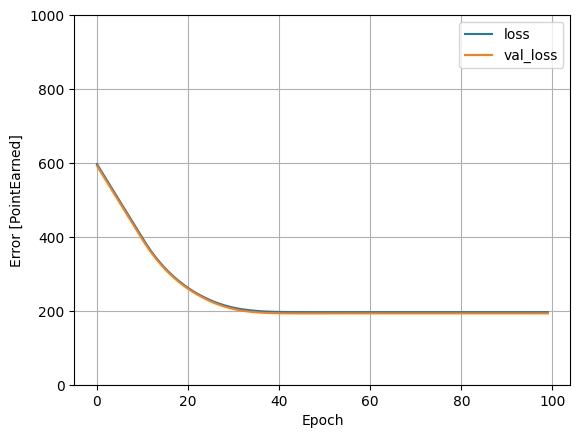

In [200]:
plot_loss(history)

Collect the results on the test set for later:

In [201]:
test_results = {}

test_results['CreditScore_model'] = CreditScore_model.evaluate(
    test_features['CreditScore'],
    test_labels, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [202]:
x = tf.linspace(0.0, 250, 251)
y = CreditScore_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [203]:
def plot_CreditScore(x, y):
  plt.scatter(train_features['CreditScore'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('CreditScore')
  plt.ylabel('PointEarned')
  plt.legend()

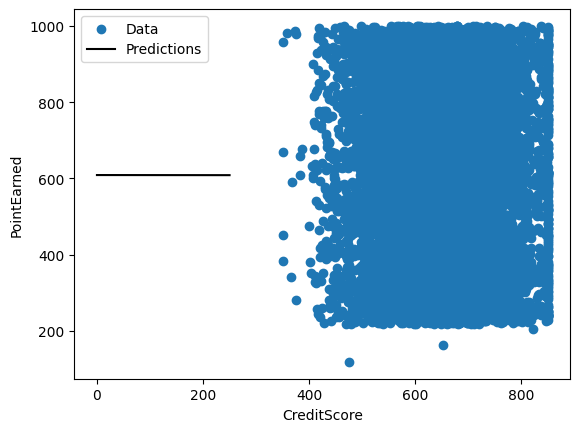

In [204]:
plot_CreditScore(x, y)